**Выявление закономерностей успешности игр**

### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Описание данных**

    - Name — название игры
    - Platform — платформа
    - Year_of_Release — год выпуска
    - Genre — жанр игры
    - NA_sales — продажи в Северной Америке (миллионы проданных копий)
    - EU_sales — продажи в Европе (миллионы проданных копий)
    - JP_sales — продажи в Японии (миллионы проданных копий)
    - Other_sales — продажи в других странах (миллионы проданных копий)
    - Critic_Score — оценка критиков (максимум 100)
    - User_Score — оценка пользователей (максимум 10)
    - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель проекта**

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План работы**

    - Загрузка данных
    - Предобработка данных
    - Исследовательский анализ данных
    - Составление портрета пользователя
    - Проверка гипотез

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

Прочитаем файл *'games.csv'* из папки /datasets, сохранив его в датафрейм *games*. Выведем на экран первые 5 строк датафрейма и общую информацию о нем.

In [2]:
#считываем файл games.csv и выводим первые пять строк на экран
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#выводим общую информацию о games
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив общую информацию о датафрейме, можем сказать, что всего в таблице 16715 строк и 11 столбцов. 

Все названия столбцов не соответствуют "хорошему" стилю. 

В некоторых столбцах имеются пропуски:

    - Name;
    - Year_of_Release;
    - Genre;
    - Critic_Score;
    - User_Score;
    - Rating.
    
2 столбца имеют неверный тип данных:

    - Year_of_Release;
    - User_Score.
    

### Предобработка данных

#### Переименование столбцов

In [4]:
#приведем названия столбцов к нижнему регистру и выведем их на экран
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия столбцов не имеют нарушений стиля.

#### Обработка пропусков

 ##### Столбец 'name'

Посчитаем процент пропусков в столбце *name*, если пропусков немного, удалим пропуски.

In [5]:
#количество пропусков в столбце name
games['name'].isnull().sum()

2

2 пропуска из 16715 строк - это примерно 0,01%, удалием пропуски

In [6]:
#удалим строки с пропусками в столбце name и выведем информацию на экран
games = games.dropna(subset=['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Строки с пропусками в столбце name удалены, теперь в датафрейме 16713 строк.

##### Столбец 'year_of_release'

Найдем количество пропусков в столбце *year_of_release*.

In [7]:
#количество пропусков в столбце year_of_release
games['year_of_release'].isnull().sum()

269

269 пропусков из 16713 строк - это приблизительно 1,6 %. Так как мы работаем с архивными данными, год - это принципиально важный показатель, 1,6 % пропусков от общего объема данных, это небольшая величина, можем удалить их.

In [8]:
#удалим строки с пропусками в столбце year_of_release и выведем количество пропусков снова
games = games.dropna(subset=['year_of_release'])
games['year_of_release'].isnull().sum()

0

##### Столбец 'critic_score'

Найдем количество пропусков в столбце *critic_score*.

In [9]:
#количество пропусков в столбце critic_score
games['critic_score'].isnull().sum()

8461

8461 пропущенных значений из 16444 строк - это 51% пропусков от общего объема данных. Заполнять пропущенные значения средним или медианой нецелесообразно, так как у нас нет никакой уверенности в том, что такое заполнение будет хоть как-то соответствовать действительности. В столбце critic_score лучше всего будет отставить пропуски как есть.

##### Столбец 'user_score'

Найдем количество пропусков в столбце *user_score*.

In [10]:
#количество пропусков в столбце user_score
games['user_score'].isnull().sum()

6605

6605 пропусков из 16444 строк составляют 40 %. Заполнять пропущенные значения средним или медианой, как и с предыдущим параметром, нецелесообразно, так как у нас нет никакой уверенности в том, что такое заполнение будет хоть как-то соответствовать действительности. Оставим пропуски в столбце user_score.

##### Столбец 'rating'

Найдем количество пропусков в столбце *rating*.

In [11]:
#количество пропусков в столбце rating
games['rating'].isnull().sum()

6676

6676 пропусков из 16444 строк составляют 41 %. Заполнять пропущенные значения средним или медианой нецелесообразно. Так как пропусков в данном столбце очень много, удалять их нельзя, заменим пропущенные значение на индикатор "unknown".

In [12]:
#заменим пропущенные значение на индикатор "unknown" и выведем таблицу с пропусками для всего датафрейма
games['rating'] = games['rating'].fillna('unknown')
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

#### Обработка дубликатов

Посчитаем количество явных дубликатов в датафрейме.

In [13]:
#количество полных дубликатов
games.duplicated().sum()

0

Явных дубликатов в датафрейме нет, посмотрим есть ли неявные дубликаты, проверим столбец *genre*, выведем все уникальные значения этого столбца.

In [14]:
#уникальные значения столбца genre
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявные дубликаты так же отсутствуют в датафрейме.

In [15]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

#### Приведение столбцов к корректному типу данных

Ранее мы указали, что два столбца имеют неверный тип данных (*year_of_release* и *user_score*), приведем эти столбцы к корретному типу данных.

In [16]:
#преобразуме столбец year_of_release к типу даты pandas, выведем первые 5 строчек на экран и общую информацию для проверки
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
display(games.head())
display(games.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       9839 non-null   object        
 10  rating           16444 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.5+ MB


None

In [17]:
#отобразим только год в столбце year_of_release и выведем первые 5 строк на экран
games['year_of_release'] = pd.DatetimeIndex(games['year_of_release']).year
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Перед приведением столбца *user_score* к формату данных *float64* изучим значения этого столбца.

In [18]:
#выведем все уникальные значения столбца user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце *user_score* помимо пропусков и чисел есть значение "tbd". Посчитаем количество этих значений.

In [19]:
#посмотрим на количество значений tbd
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
0.5       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

2376 строк со значением "tbd" в столбце user_score, это примерно 14 % от общего объема данных. Удалять это нельзя, заменим данные значения на индикатор "-1".

In [20]:
#заменим значения tbd на "-1" и выведем количество уникальных значений столбца user_score на экран
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1
games['user_score'].value_counts()

-1     2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.7       2
0.3       2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [21]:
#приведение столбца user_score к типу данных float64 и вывод общей информации о датафрейме на экран
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Подсчет суммарной продажи во всех регионах

Создадим новый столбец со значением суммарной продажи во всех регионах, для этого сложим продажи в Северной Америке с продажами в Европе с продажами в Японии и продажами в других странах.

In [22]:
#создадим новый столбец с суммой продаж во всех регионах
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Проведем проверку неявных дубликатов, например с название игры, названием платформы и годом выпуска.

In [23]:
games.duplicated(subset=['name','platform', 'year_of_release']).sum() 

1

In [24]:
games.drop_duplicates(subset=['name','platform', 'year_of_release'])
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


 Наиболее вероятно, в данном исследовании пропуски могли возникнуть по техническим причинам, например, они могли появиться при загрузке/выгрузке данных из файла, могли появиться в случаях, когда данные собирались из разных источников или в системе были какие-то сбои при логировании.

### Исследовательский анализ данных

#### Исследование количества выпускаемых игр по годам

Посчитаем количество выпускаемых игр за каждый год.

In [29]:
#с помощью сводной таблицы pivot_table построим датафрейм с количеством выпускаемых игр за каждый год
game_sales = games.groupby('year_of_release').agg({'name':'count'})
game_sales = game_sales.rename(columns={'name':'Кол-во проданных игр (млн.)'}, level=0)
game_sales.index = game_sales.index.rename('год')
game_sales

,Кол-во проданных игр (млн.)
год,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


По этой таблице построим столбчатую диаграмму для визуализации.

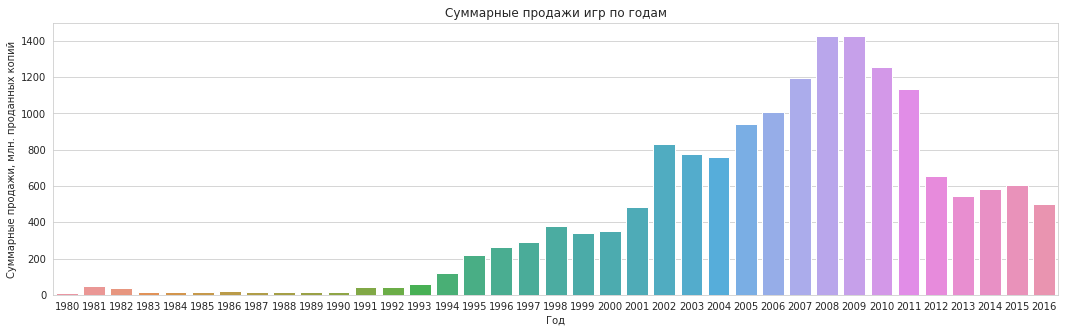

In [30]:
game_sales = games.pivot_table(index='year_of_release', values='name', aggfunc='count') 

sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data=games, x='year_of_release');
plt.title('Суммарные продажи игр по годам')
plt.ylabel('Суммарные продажи, млн. проданных копий')
plt.xlabel('Год');

В таблице представлены игры с выпуском с 1980 по 2016 год, с 1994 года количество выпускаемых игр начинает активно расти, пик приходится на 2007-2008 года, в эти года было выпущено 1427 и 1426 игр соответственно, после 2008 года начинается спад, начиная с 2012 года количество выпускаемых игр в год отличаются незначитально. Логичнее всего взять данные за последние 10 лет, так как в старые игры играют намного реже, чем в новые.

#### Исследование продаж по платформам

Построим сводную таблицу продаж по всем платформам датафрейма и построим диаграмму для ее реализации.

In [27]:
#сводная таблица продаж по платформам
games_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
games_platform

,total_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


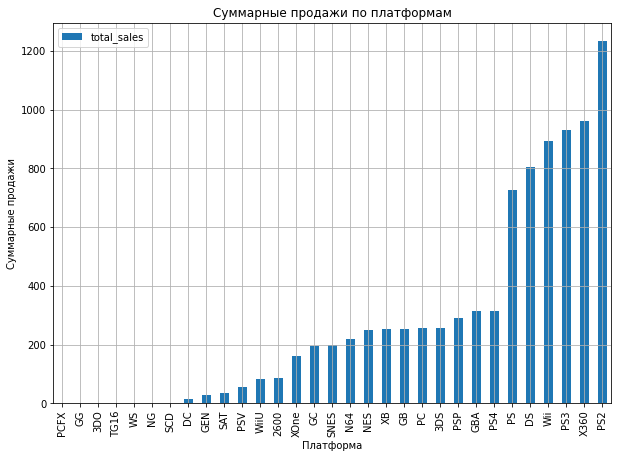

In [28]:
#отсортируем датафрейм по возрастанию суммы всех продаж и постром столбчатую диаграмму
games_platform.sort_values(by='total_sales', ascending='False').plot(kind='bar', grid='True', figsize=(10, 7))
plt.title('Суммарные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

По графику видим, что наибольшая сумма всех продаж у 6 платформ, построим по этим 6 платформам распределение по годам. Сохраним топовые платформы в отдельный датафрейм и построим диаграмму.

In [31]:
#оставим в датафрейме данные только по 6 платформам с самыми высокими суммарными продажами
top_platform = games[games['platform'].isin(['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'])]
top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,-1.0,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


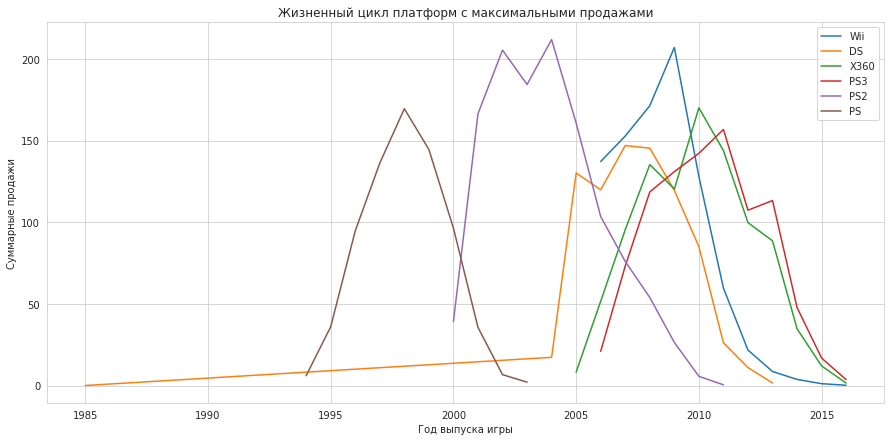

In [32]:
#построим диаграмму жизненного цикла платформ с максимальными продажами
for i in top_platform['platform'].unique():
    (top_platform.query('platform == @i')
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(grid='True', figsize=(15, 7), label=i))
plt.title('Жизненный цикл платформ с максимальными продажами')
plt.xlabel('Год выпуска игры')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

In [33]:
#находим количество упоминаний о платформе DS до 2004 года
top_platform.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


По построенной диаграмме видим, что платформа PS существовала примерно с 1994 по 2003 годы, платформа PS2 - 2000 - 2011 годы, Wii - приблизительно 2006 - 2016 годы, X360 - 2005 - 2016 годы, PS3 - 2006 - 2016 годы, DS - 2004 - 2013 годы. Есть одно упоминание о платформе DS в 1985 годы, но судя по проверке это только одно упоминание, поэтому скоррее всего это ошибка в данных, это значение не берем в расчет. Исходя из этого можно сделать вывод, что жизненный цикл платформ приблизительно 10 лет.

#### Исследование на потенциально прибыльные платформы

При исследовании потенциальной прибыли нас интересует период, когда продажи по платформам растут или находятся на пике, это первая половина жизненного цикла платформы. Еще раз посмотри на график жизненного цикла платформ, для PS продажи росли с 1994 по 1998 года, для PS2 - это 2000 - 2004 годы, Wii - 2001 - 2004 годы, X360 - 2005 -2010 годы, PS3 - 2006-2011 годы и для DS - это 2004 - 2008 годы. Берем медиану: актуальный период составляет 4 последних года, т.е. с 2012 года. Актуализируем исходный датафрейм.

In [34]:
#создадим датафрейм с данными за актуальный период
actual_games = games.query('year_of_release >= 2012').reset_index(drop= True)
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


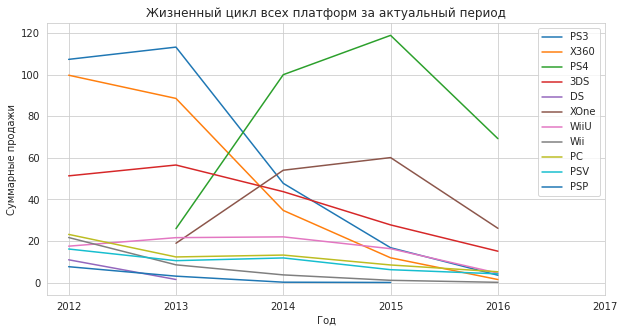

In [36]:
#построим диаграмму жизненного цикла платформ за актуальный период
for p in actual_games['platform'].unique():
    (actual_games.query('platform == @p')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .sort_values(by='year_of_release', ascending=False)['total_sales']
     .plot(kind='line', figsize = (10, 5), label=p)
    )
    
plt.title('Жизненный цикл всех платформ за актуальный период')
plt.xticks(np.arange(2012, 2018, step=1))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend()
plt.show()

Из графика видно, что в 2016 году ни у одной из платформ нет роста прибыли, у всех платформ продажи падают. Лидеры продаж на 2016 год платформы PS4 и XOne, но их прибыль так же падает.

#### Исследование диаграммы размаха по глобальным продажам игр в разбивке по платформам

Построим так называемый "ящик с усами" по глобальным продажам игр в разбивке по платформам за актуальный период, для этого подключим библиотеку seaborn и используем метод boxplot().

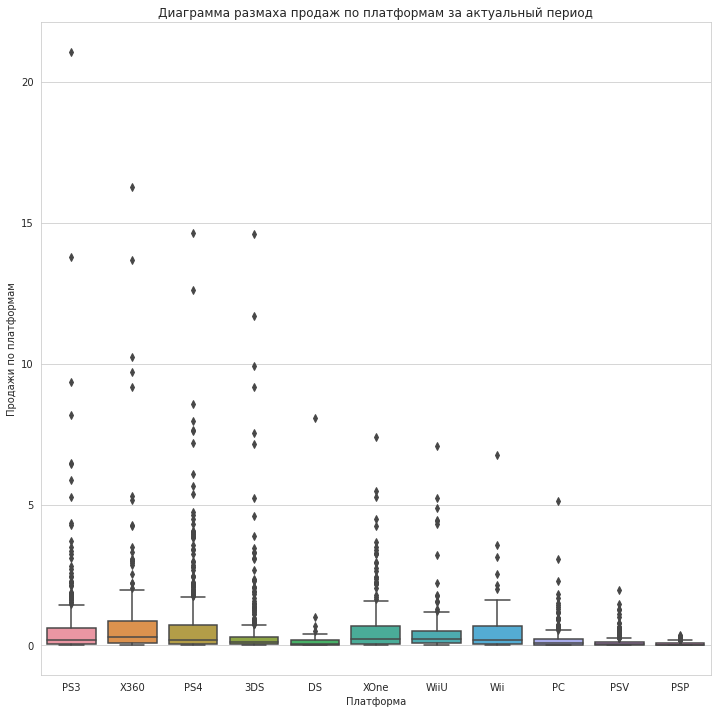

In [38]:
#построим диаграмму размаха продаж по платформам за актуальный период
plt.figure(figsize=(12, 12))
sns.boxplot(data=actual_games, x='platform', y='total_sales')
plt.title('Диаграмма размаха продаж по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.show()

По данной диаграмме размаха сложно сделать вывады, так как есть выбросы по всем платформам, а сам "ящик" и "усы" можно описать только очень очень приблизительно. Зададим границы графику по значению **у** от 0 до 2,5 и построим описательную статистику по столбцу **'total_sales'**.

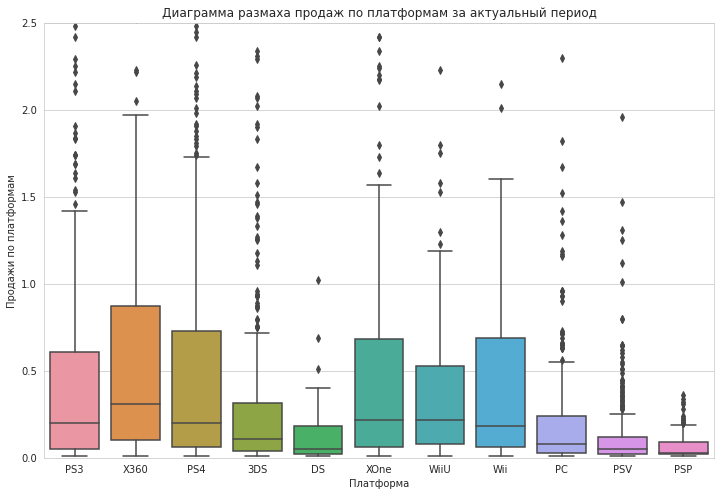

In [39]:
#построим диаграмму размаха с заданными границами оси ординат (0, 2.5)
plt.figure(figsize=(12, 8))
large = sns.boxplot(data=actual_games, x='platform', y='total_sales')
large.set(ylim=(0, 2.5))
plt.title('Диаграмма размаха продаж по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.show()

In [40]:
#выведем описательную статистику суммарных продаж за актуальный период
actual_games['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

Исходя из описательной статистики и диаграммы размаха можно сделать вывод, что по всем платформам есть выбросы. Медианное значение всего датафрейма равно 0,12, по большинству платформам медианное значение отличается от этого значения. Границы "ящика" - первый и третий квартили также сильно отличаются от значений по всего датафрейму.

#### Исследование влияния на продажи отзывов пользователей и критиков

Выведем сводную таблицу суммарных продаж по платформам за актуальный период.

In [41]:
#выведем сводную таблицу суммарных продаж по платформам за актуальный период
actual_platforms = (actual_games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                       .sort_values(by='total_sales', ascending=False))
actual_platforms

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Возьмем самую популярную платформу с 2012 года - PS4, построим по ней диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами.

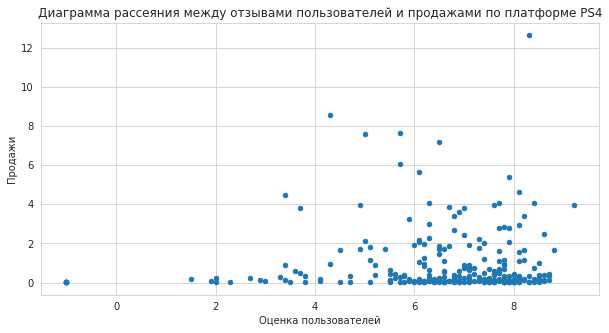

In [42]:
#построим диаграмму рассеяния по платформе PS4 между отзывами пользователей и продажами за актуальный период
actual_games.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами по платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [43]:
#выведем коэффициент корреляции по платформе PS4 между отзывами пользователей и продажами 
actual_games.query('platform == "PS4"')['user_score'].corr(actual_games.query('platform == "PS4"')['total_sales'])

0.02910955953292179

Как мы видим и по диаграмме рассеяния и по коэффициенту корреляции, зависимости между отзывами пользователей и продажами нет. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами по платформе PS4.

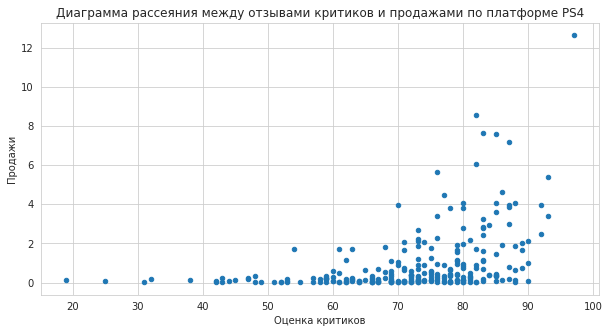

In [44]:
#построим диаграмму рассеяния по платформе PS4 между отзывами критиков и продажами за актуальный период
actual_games.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами критиков и продажами по платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [45]:
#выведем коэффициент корреляции платформе PS4 между отзывами критиков и продажами 
actual_games.query('platform == "PS4"')['critic_score'].corr(actual_games.query('platform == "PS4"')['total_sales'])

0.40656790206178095

Диаграмма рассеяния и коэффициент корреляции, равный 0,41, между отзывами критиков и продажами по платформе PS4 показывают умеренную взаимосвязь между этими величинами.

Для весомости проведем аналогичные расчеты еще по двум популярным платформам, следующими за PS4, это PS3 и X360. Так же построим диаграммы рассеяния и посчитаем корреляции между отзывами и продажами.

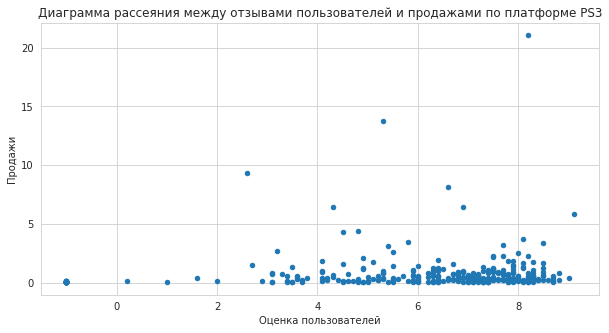

In [46]:
#построим диаграмму рассеяния по платформе PS3 между отзывами пользователей и продажами за актуальный период
actual_games.query('platform == "PS3"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами по платформе PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [47]:
#выведем коэффициент корреляции по платформе PS3 между отзывами пользователей и продажами 
actual_games.query('platform == "PS3"')['user_score'].corr(actual_games.query('platform == "PS3"')['total_sales'])

0.10036626119874081

Коэффициент корреляции между отзывами пользователей и продажами для платформы PS3 немного больше,чем для платформы PS4, но мы по-прежнему можем сказать, что зависимости между отзывами пользователей и продажами нет. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами по платформе PS3.

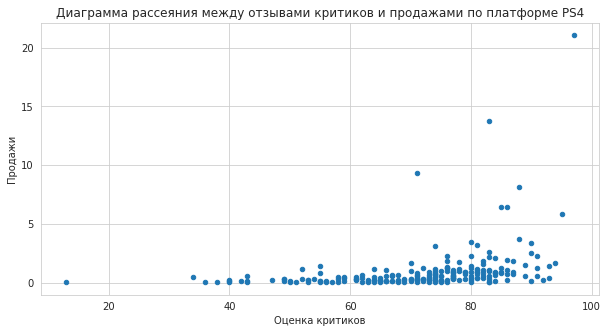

In [48]:
#построим диаграмму рассеяния по платформе PS3 между отзывами критиков и продажами за актуальный период
actual_games.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами критиков и продажами по платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [49]:
#выведем коэффициент корреляции платформе PS3 между отзывами критиков и продажами 
actual_games.query('platform == "PS3"')['critic_score'].corr(actual_games.query('platform == "PS3"')['total_sales'])

0.3314972592629587

Диаграмма рассеяния и коэффициент корреляции, равный 0,33, между отзывами критиков и продажами по платформе PS3 показывают умеренную взаимосвязь между этими величинами.

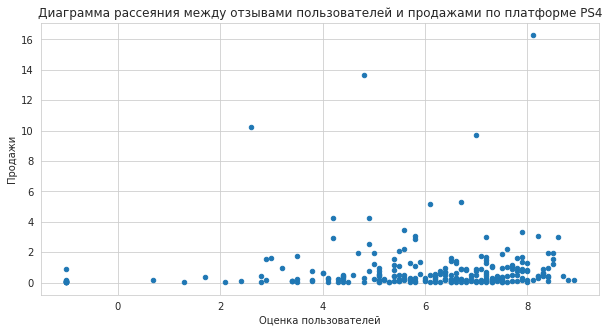

In [50]:
#построим диаграмму рассеяния по платформе X360 между отзывами пользователей и продажами за актуальный период
actual_games.query('platform == "X360"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами по платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [51]:
#выведем коэффициент корреляции по платформе X360 между отзывами пользователей и продажами 
actual_games.query('platform == "X360"')['user_score'].corr(actual_games.query('platform == "X360"')['total_sales'])

0.06684859572221076

Коэффициет корреляции между отзывами пользователей и продажами для X360 равен 0,07, что говорит нам что связь между этими величинами отсутствует. Построим диаграмму рассеяния и найдем коэффициент корреляции между отзывами критиков и продажами.

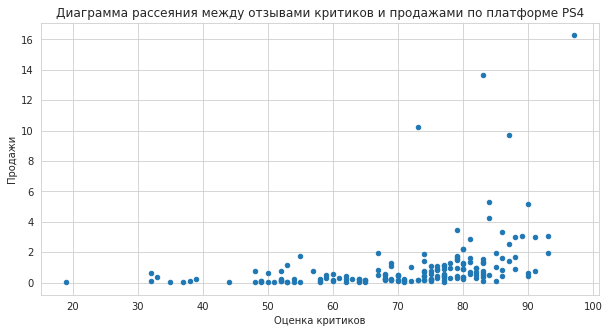

In [52]:
#построим диаграмму рассеяния по платформе X360 между отзывами критиков и продажами за актуальный период
actual_games.query('platform == "X360"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами критиков и продажами по платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [53]:
#выведем коэффициент корреляции платформе X360 между отзывами критиков и продажами 
actual_games.query('platform == "X360"')['critic_score'].corr(actual_games.query('platform == "X360"')['total_sales'])

0.3605734888507336

Коэффициент корреляции между отзывами критиков и продажами для X360, очень близок по значению и к аналогичному коэффициенту и по PS4 и по PS3. Наши выводы, что между отзывами критиков и продажами существует умеренную взаимосвязь подтверждаются.

Проведем аналогичные расчеты для всех платформ за актуальный период.

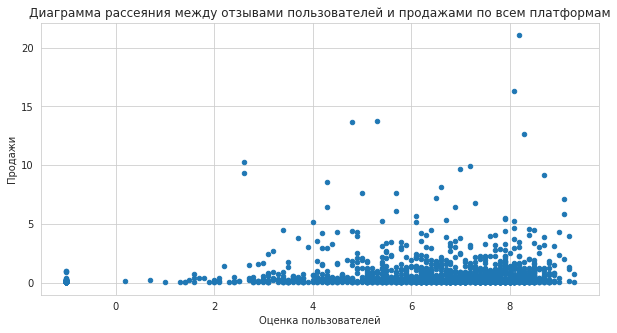

In [54]:
#построим диаграмму рассеяния по всем платформам между отзывами пользователей и продажами за актуальный период
actual_games.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами по всем платформам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [55]:
#выведем коэффициент корреляции по всем платформам между отзывами пользователей и продажами 
actual_games['user_score'].corr(actual_games['total_sales'])

0.10282078357680646

Коэффициент корреляции 0,1 и диаграмма рассеяния указывают на слабую взаимосвязь между между отзывами пользователей и продажами по всем платформам за актуальный период.

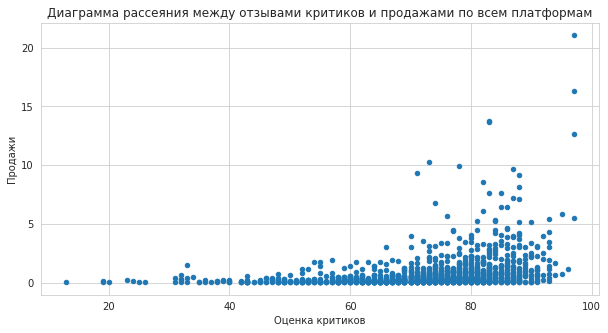

In [56]:
#построим диаграмму рассеяния по всем платформам между отзывами критиков и продажами за актуальный период
actual_games.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между отзывами критиков и продажами по всем платформам')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [57]:
#выведем коэффициент корреляции по всем платформам между отзывами критиков и продажами 
actual_games['critic_score'].corr(actual_games['total_sales'])

0.3081967459207781

Диаграмма рассеяния и коэффициент корреляции 0,31 говорят нам об умеренной связи между отзывами критиков и продажами по все платформам за актуальный период.

#### Исследование распределения игр по жанрам

Найдем суммарные продажи по жанрам ирг за актуальный период и простроим столбчатую диаграмму.

In [58]:
#построим сводную таблицу суммарных продаж по жанрам игр
actual_genre = (actual_games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
               .sort_values(by='total_sales', ascending=False))
actual_genre

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


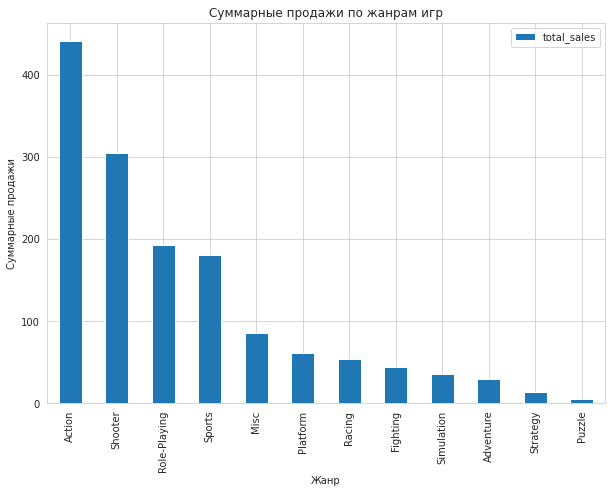

In [59]:
#построим столбчатую диаграмму по сводной таблице
actual_genre.plot(kind='bar', grid='True', figsize=(10, 7))
plt.title('Суммарные продажи по жанрам игр')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

По таблице и диаграмме видим, что самый продаваем жанр игр - это *Action*, на втором месте *Shooter*, самые непопулярные игры из жанра *Puzzle*. Построим диаграмму размаха суммарных продаж по всем жанрам за актуальный период.

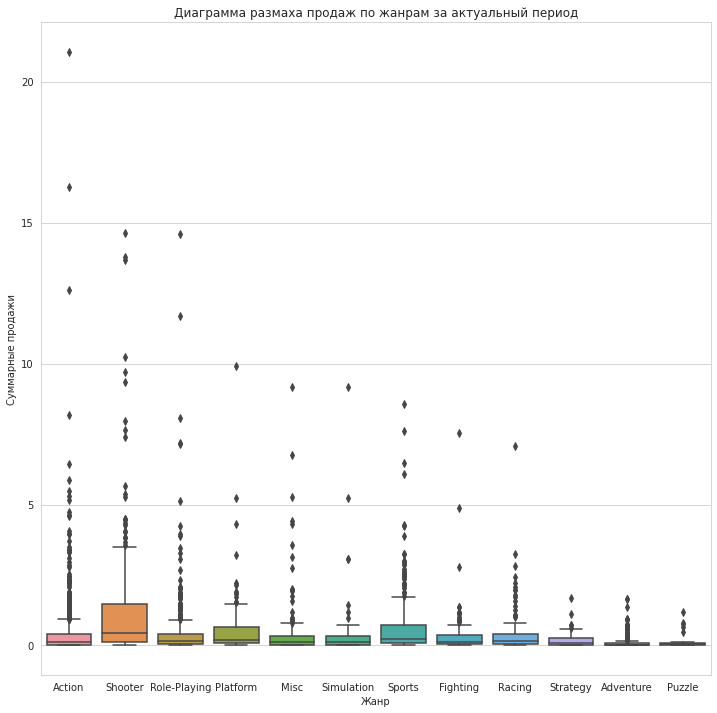

In [60]:
#построим диаграмму размаха продаж по жанрам за актуальный период
plt.figure(figsize=(12, 12))
sns.boxplot(data=actual_games, x='genre', y='total_sales')
plt.title('Диаграмма размаха продаж по жанрам за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

Из-за большого диапазона выбросов данная диаграмма размаха нечитабельна, построим диаграмму размаха при значениях оси ординат от 0 до 2.

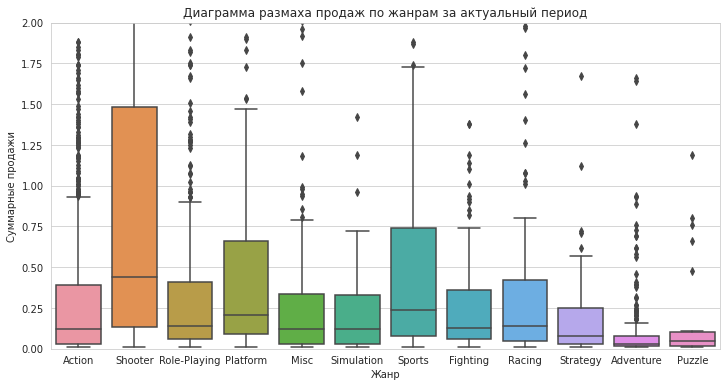

In [61]:
#построим диаграмму размаха продаж по жанрам за актуальный период
plt.figure(figsize=(12, 6))
box_genre = sns.boxplot(data=actual_games, x='genre', y='total_sales')
box_genre.set(ylim=(0, 2))
plt.title('Диаграмма размаха продаж по жанрам за актуальный период')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

По диаграмме размаха видно, что медианное значение суммарных продаж нескоторых жанров выше, чем у жанра Action, построим сводную таблицу с медианой суммарных продаж по каждому жанру.

In [62]:
# построим сводную таблицу с медианой суммарных продаж по каждому жанру
genre_median = (actual_games.pivot_table(index='genre', values='total_sales', aggfunc='median')
               .sort_values(by='total_sales', ascending=False))
genre_median

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


По медианным значениям видно, что наиболее прибыльными являются игры в жанрах Shooter, Sports и Platform.

### Составление портрета пользователя каждого региона

#### Самые популярные платформы для пользователя каждого региона

Найдем топ-5 платформ для пользователей каждого региона: Северной Америки, Европы и Японии. 

In [63]:
#создадим сводную таблицу с названием платформы и суммарными продажами в Северной Америке
#отсортируем по убыванию суммы продаж и выведем первые 10 строк на экран
na_top_platforms = (actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False).reset_index())
na_top_platforms.head(10)

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,WiiU,38.10
6,PC,19.12
7,Wii,17.45
8,PSV,10.98
9,DS,4.59


In [64]:
#оставим топ-5 платформ в Северной Америке, остальные переименуем, выведем первые 10 строк на экран
na_top_platforms.loc[5:,'platform'] = 'other_games'
na_top_platforms.head(10)

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,other_games,38.10
6,other_games,19.12
7,other_games,17.45
8,other_games,10.98
9,other_games,4.59


In [65]:
#посчитаем сумму продаж всех платформ, не входящих в топ-5, в Северной Америке
na_top_platforms.loc[5, 'na_sales'] = na_top_platforms.query('platform == "other_games"')['na_sales'].sum()
na_top_platforms.head(6)

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31
5,other_games,90.37


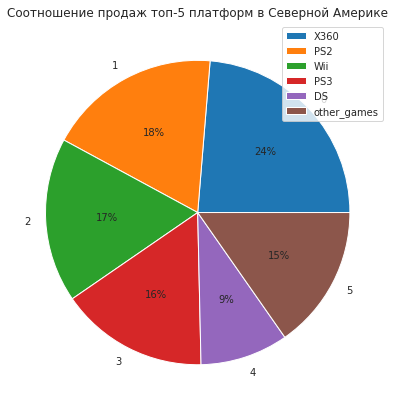

In [66]:
#выведем круговую диаграмму с долями продаж топ-5 и остальных платформ в Северной Америке
na_top_platforms['na_sales'].head(6).plot(
    kind= 'pie',
    title= 'Соотношение продаж топ-5 платформ в Северной Америке',
    autopct = "%.0f%%",
    ylabel= "",
    figsize=(15, 7)
)
plt.legend(('X360', 'PS2', 'Wii', 'PS3', 'DS', 'other_games'))
plt.show()

По круговой диаграмме видим, что 24% всех продаж занимает X360, продажи по платформам PS2, Wii и PS3 примерно равны, 18%, 17% и 16% соответственно, прибыль платформы DS составляет 9% от продаж в Северной Америке. Остальные 15% прибыли приносят игры на других платформах.

In [67]:
#создадим сводную таблицу с названием платформы и суммарными продажами в Европе
#отсортируем по убыванию суммы продаж и выведем первые 10 строк на экран
eu_top_platforms = (actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False).reset_index())
eu_top_platforms

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,PC,37.76
6,WiiU,25.13
7,Wii,11.92
8,PSV,11.36
9,DS,3.53


In [68]:
#оставим топ-5 платформ в Европе, остальные переименуем, выведем первые 10 строк на экран
eu_top_platforms.loc[5:,'platform'] = 'other_games'
eu_top_platforms

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,other_games,37.76
6,other_games,25.13
7,other_games,11.92
8,other_games,11.36
9,other_games,3.53


In [69]:
#посчитаем сумму продаж всех платформ, не входящих в топ-5, в Европе
eu_top_platforms.loc[5, 'eu_sales'] = eu_top_platforms.query('platform == "other_games"')['eu_sales'].sum()
eu_top_platforms.head(6)

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,other_games,90.12


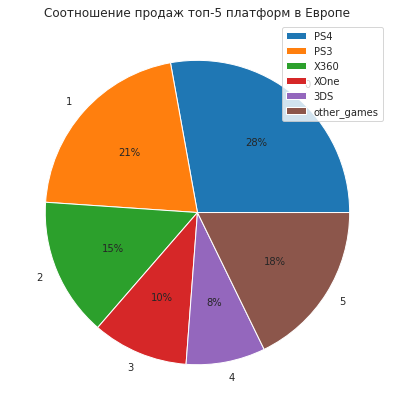

In [70]:
#выведем круговую диаграмму с долями продаж топ-5 и остальных платформ в Европе
eu_top_platforms['eu_sales'].head(6).plot(
    kind= 'pie',
    title= 'Соотношение продаж топ-5 платформ в Европе',
    autopct = "%.0f%%",
    ylabel= "",
    figsize=(15, 7)
)
plt.legend(('PS4', 'PS3', 'X360', 'XOne', '3DS', 'other_games'))
plt.show()

На круговой диаграмме видно, что самая популярная консоль в Европе - PS4, прибыль от продаж игр на нее составляет 28% от всех продаж в этом регионе. На втором месте поп популярности PS3 - прибыльность 21%, далее 15% составляет прибыль от продаж игр на X360, 10% - на XOne, и 8% на 3DS. Суммарная продажа игр на все другие платформы составляет 18% от общей прибыль с игр в Европе.

In [71]:
#создадим сводную таблицу с названием платформы и суммарными продажами в Японии
#отсортируем по убыванию суммы продаж и выведем первые 10 строк на экран
jp_top_platforms = (actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False).reset_index())
jp_top_platforms.head(10)

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,PSP,10.47
6,DS,3.72
7,Wii,3.39
8,X360,1.57
9,XOne,0.34


In [72]:
#оставим топ-5 платформ в Японии, остальные переименуем, выведем первые 10 строк на экран
jp_top_platforms.loc[5:,'platform'] = 'other_games'
jp_top_platforms.head(10)

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,other_games,10.47
6,other_games,3.72
7,other_games,3.39
8,other_games,1.57
9,other_games,0.34


In [73]:
#посчитаем сумму продаж всех платформ, не входящих в топ-5, в Японии
jp_top_platforms.loc[5, 'jp_sales'] = jp_top_platforms.query('platform == "other_games"')['jp_sales'].sum()
jp_top_platforms.head(6)

,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,other_games,19.49


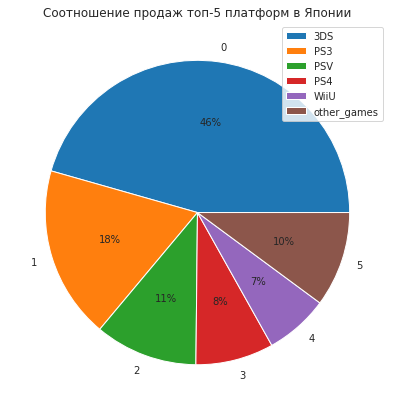

In [74]:
#выведем круговую диаграмму с долями продаж топ-5 и остальных платформ в Японии
jp_top_platforms['jp_sales'].head(6).plot(
    kind= 'pie',
    title= 'Соотношение продаж топ-5 платформ в Японии',
    autopct = "%.0f%%",
    ylabel= "",
    figsize=(15, 7)
)
plt.legend(('3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'other_games'))
plt.show()

Результат в Японии отличается от результата в Европе и Северной Америке, лидирующее место в топ-5 всех платформ здесь уверенно занимает платформа 3DS, 46% от всех прибыли от продажи игр, к примеру в Европе всего 8%. На втором месте, но с большим отрывом идет платформа PS3, 18% от всей прибыли, далее 11% - PSV, 8 % - PS4, 7% - WiiU. Прибыль от продажи игр на всех остальных платформах составляет 10%. 

#### Самые популярные жанры для пользователя каждого региона

In [75]:
#создадим сводную таблицу с названием жанра и суммарными продажами в Северной Америке
#отсортируем по убыванию суммы продаж
#оставим топ-5 жанров, остальные переименуем
#посчитаем сумму продаж всех жанров, не входящих в топ-5, в Северной Америке и выведем первые 6 строк на экран
na_top_genre = (actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                   .sort_values(by='na_sales', ascending=False).reset_index())
na_top_genre.loc[5:,'genre'] = 'other_genre'
na_top_genre.loc[5, 'na_sales'] = na_top_genre.query('genre == "other_genre"')['na_sales'].sum()
na_top_genre.head(6)

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,other_genre,84.64


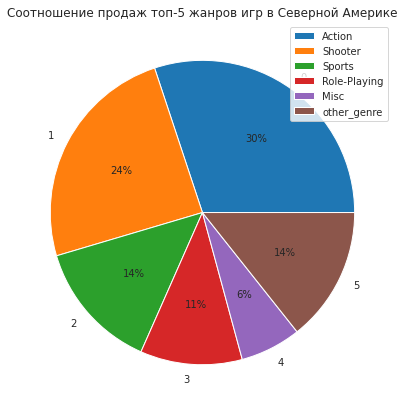

In [76]:
#выведем круговую диаграмму с долями продаж топ-5 и остальных жанров в Северной Америке
na_top_genre['na_sales'].head(6).plot(
    kind= 'pie',
    title= 'Соотношение продаж топ-5 жанров игр в Северной Америке',
    autopct = "%.0f%%",
    ylabel= "",
    figsize=(15, 7)
)
plt.legend(('Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'other_genre'))
plt.show()

По круговой диаграмме можем сказать, что больше всего пользователи в Северной Америке предпочитают игры в жанре Action, этот жанр занимает 30% прибыли от продажи всех игр в этом регионе. 24% прибыли составляют игры в жанре Shooter, далее идут Sports - 14%, Role-Playing - 11% и Misc - 8% от всех игр. Прибыль от продажи игр в других жанрах составляют 14% от всей прибыли в Северной Америке.

In [77]:
#создадим сводную таблицу с названием жанра и суммарными продажами в Европе
#отсортируем по убыванию суммы продаж
#оставим топ-5 жанров, остальные переименуем
#посчитаем сумму продаж всех жанров, не входящих в топ-5, в Европе и выведем первые 6 строк на экран
eu_top_genre = (actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                   .sort_values(by='eu_sales', ascending=False).reset_index())
eu_top_genre.loc[5:,'genre'] = 'other_genre'
eu_top_genre.loc[5, 'eu_sales'] = eu_top_genre.query('genre == "other_genre"')['eu_sales'].sum()
eu_top_genre.head(6)

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,other_genre,89.10


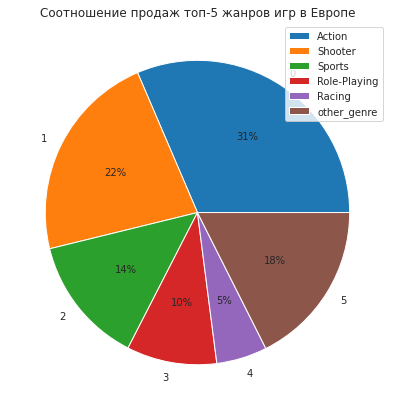

In [78]:
#выведем круговую диаграмму с долями продаж топ-5 и остальных жанров в Европе
eu_top_genre['eu_sales'].head(6).plot(
    kind= 'pie',
    title= 'Соотношение продаж топ-5 жанров игр в Европе',
    autopct = "%.0f%%",
    ylabel= "",
    figsize=(15, 7)
)
plt.legend(('Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing', 'other_genre'))
plt.show()

Круговая диаграмма соотношения продаж топ-5 игр жанров в Европе очень похожа на круговую диаграмму Северной Америки.Так же, как и в Северной Америке европейцы больше всего предпочитают игры в жанре Action, этот жанр занимает 31% прибыли от продажи всех игр в этом регионе. 22% прибыли составляют игры в жанре Shooter, против 24% в Северной Америке, те же 14% у игр в жанре Sports, Role-Playing - 10%. Отличие только в жанре Racing, который в Европе занимает 5 место и 5% прибыли от продажи всех игр. Прибыль от продажи игр в других жанрах составляют 18% от всей прибыли в Европе.

In [79]:
#создадим сводную таблицу с названием жанра и суммарными продажами в Японии
#отсортируем по убыванию суммы продаж
#оставим топ-5 жанров, остальные переименуем
#посчитаем сумму продаж всех жанров, не входящих в топ-5, в Японии и выведем первые 6 строк на экран
jp_top_genre = (actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                   .sort_values(by='jp_sales', ascending=False).reset_index())
jp_top_genre.loc[5:,'genre'] = 'other_genre'
jp_top_genre.loc[5, 'jp_sales'] = jp_top_genre.query('genre == "other_genre"')['jp_sales'].sum()
jp_top_genre.head(6)

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,other_genre,41.63


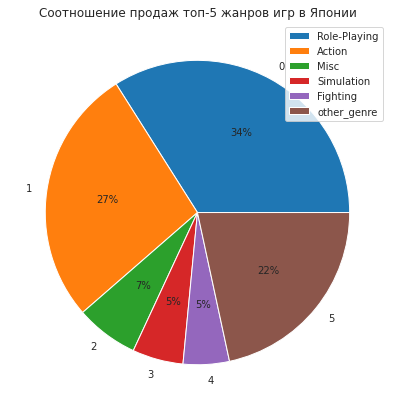

In [80]:
#выведем круговую диаграмму с долями продаж топ-5 и остальных жанров в Японии
jp_top_genre['jp_sales'].head(6).plot(
    kind= 'pie',
    title= 'Соотношение продаж топ-5 жанров игр в Японии',
    autopct = "%.0f%%",
    ylabel= "",
    figsize=(15, 7)
)
plt.legend(('Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting', 'other_genre'))
plt.show()

В Японии, так же как и с платформами совершенно другая картина. Лидируют игры в жанре Role-Playing - им отведено 31 % прибыли от продажи всех игр в Японии, в сравнении в Америке и Европе игры этого жанра составляю 11% и 10% соответственно. На втором месте в Японии игры в жанре Action - 27%, игры в жанрах Misc - 7% , Simulation и Fighting составляю всего по 5 % от прибыли от продаж всех игр в Японии. Прибыль от продажи игр в других жанрах составляют 22% от всей прибыли в Японии.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

Построим круговые диаграммы долей продаж в зависимости от рейтинга ESRB в разных регионах.

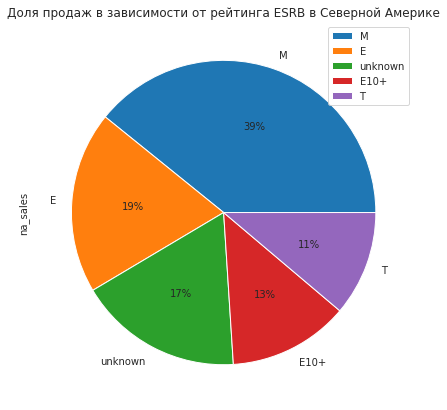

In [81]:
#построим круговую диаграмму долей продажв зависимости от рейтинга ESRB в Северной Америке
(actual_games.pivot_table(index='rating', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales', ascending=False)
     .plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(15, 7), title = 'Доля продаж в зависимости от рейтинга ESRB в Северной Америке'))
plt.show()

Продажи игр для взрослых (категория М) состаляют 39% от всех продаж в Северной Америке, 19% - это иргы для всех (категория Е), 13% - игры для всех от 10 лет (категория Е10+) и  11% - игры подросткам (категория Т). В колонке с рейтингом ESRB было много пропусков, которые составляют 17% в Северной Америке.

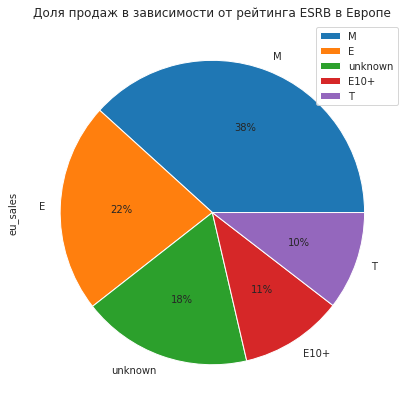

In [82]:
#построим круговую диаграмму долей продаж в зависимости от рейтинга ESRB в Европе
(actual_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
     .sort_values(by='eu_sales', ascending=False)
     .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(15, 7), title = 'Доля продаж в зависимости от рейтинга ESRB в Европе'))
plt.show()

Распределение долей продаж в зависимости от рейтинга ESRB в Европе выглядит так же как в Америке, только немноого другие проценты. В целом картина идентична.

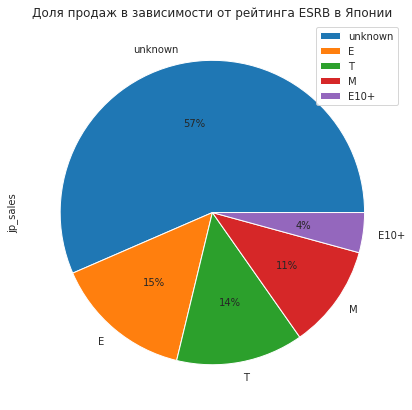

In [83]:
#построим круговую диаграмму долей продажв зависимости от рейтинга ESRB в Японии
(actual_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
     .sort_values(by='jp_sales', ascending=False)
     .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(15, 7), title = 'Доля продаж в зависимости от рейтинга ESRB в Японии'))
plt.show()

В Японии картина совершенно другая, первое место занимают игры с неуказанным рейтингом - 57%. Далее идут игры для всех - 15%, игры для подростков - 14%, игры для взрослых - 11% и игры для всех с 10 лет - 4%.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвенем гипотезы:

   **Н0**: Средние пользовательские рейтинги платформ *Xbox One* и *PC* равны
   
   **Н1**: Средние пользовательские рейтинги платформ *Xbox One* и *PC* не равны

Задаваемый вопрос определяет в данном случае нулевую гипотезу: Средние пользовательские рейтинги платформ *Xbox One* и *PC* равны, так как интересует именно равенство в альтернативной гипотезе мы будем проверять неравенство: Средние пользовательские рейтинги платформ Xbox One и PC не равны. В данном случае проверка двухсторонняя alternative='two-sided', используем метод проверки гипотез **st.ttest_ind**.
Необходимо проверить равны ли наши генеральные совокупности по Xbox One и PC.

In [84]:
xone = actual_games.query('platform == "XOne" and user_score > -1')
xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [85]:
pc = actual_games.query('platform == "PC" and user_score > -1')
pc['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Описательный анализ показывает, что генеральные совокупности не равны в размерах, у них разные среднеквадратические отклонения (std), следовательно и дисперсии. Критерий статистической значимости установим 5%.

In [86]:
from scipy import stats as st

In [87]:
alpha = 0.05

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'],
    equal_var=False, #так как совокупности не равны
    alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, можем предполагать, что рейтинги платформ XOne и PC равны, при установленном уровне значимости в 5 %.

#### Средние пользовательские рейтинги жанров Action и Sports разные

Выдвенем гипотезы:

   **Н0**: Средние пользовательские рейтинги жанров *Action* и *Sports*  равны
   
   **Н1**: Средние пользовательские рейтинги жанров *Action* и *Sports*  не равны

В данном случае следует исходить от обратного, нулевая гипотеза: Средние пользовательские рейтинги жанров *Action* и *Sports*  равны, следовательно в альтернативной гипотезе мы будем проверять неравенство: Средние пользовательские рейтинги жанров *Action* и *Sports*  не равны. В данном случае, как и в предыдущем проверка двухсторонняя alternative='two-sided', используем метод проверки гипотез **st.ttest_ind**.
Необходимо проверить равны ли наши генеральные совокупности по рейтингам жанров Action* и *Sports*.

In [88]:
action = actual_games.query('genre == "Action" and user_score > -1')
action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [89]:
sports = actual_games.query('genre == "Sports" and user_score > -1')
sports['user_score'].describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Описательный анализ показывает, что генеральные совокупности не равны в размерах. Критерий статистической значимости установим 5%.

In [90]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'],
    equal_var=False, #так как совокупности не равны
    alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.24307776572644e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно, мы можем полагать, что Средние пользовательские рейтинги жанров Action и Sports не равны при критерии статистической значимости в 5%.

### Вывод

В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах были выполнены работы по предобработке данных: переименованы все столбцы датафрейма, обработаны пропуски в столбцах *'name'*, *'year_of_release'*, *'critic_score'*,*'user_score'* и *'rating'*, столбцы *year_of_release* и *user_score* приведены к корректному типу данных, добавлен столбец с суммарными продажами во всех регионах. Так же были удалены явные и "неявные" дубликаты.

Провели исследовательский анализ данных: определили, что логичнее всего взять данные за последние 10 лет, так как в старые игры играют намного реже, чем в новые. Определили, что жизненный цикл платформ приблизительно 10 лет. Выявили актуальный период, который составляет 4 последних года, т.е. с 2012 года. В 2016 году ни у одной из платформ нет роста прибыли, у всех платформ продажи падают. Лидеры продаж на 2016 год платформы PS4 и XOne, но их прибыль так же падает. Между оценками пользователей и продажами слабая связь, между оценками критиков и продажами связь умеренная. Наиболее прибыльными являются игры в жанрах Shooter, Sports и Platform.

Составили портрет пользователя каждого региона: портреты пользователя в Северной Америке и Европе во многом похожи. Лидируют платформа PS4, PS3, X360 жанры Action, Sports игры с рейтингом M - для взрослых. Портрет пользователя из Японии во многом отличается, платформы 3DS, PS3 жанры Role-Playing, Action игры с неуказанным рейтингом unknown.

Проверили гипотезы:

Гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось отвергнуть, можем предполагать, что рейтинги платформ XOne и PC равны, при установленном уровне значимости в 5 %.

Гипотеза о равестве  средних пользовательских рейтингов жанров Action и Sports была отвергнута, следовательно, мы можем полагать, что средние пользовательские рейтинги жанров Action и Sports не равны при критерии статистической значимости в 5%.

Вывод такой: Планировать рекламную кампанию интернет магазина "Стримчик" необходимо с учетом потенциально популярных продуктов, на платформе PS4,таких жанров как Shooter и Sports с рейтингом "M" (для взрослых)